In [2]:
import pandas as pd
import os, sys
import numpy as np

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

from utils.prediction_utils import *

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb

random_seed = 42

In [3]:
base_dir = "/Users/andrew/Desktop/Harvard/idreos-research/gpu_profiling/experiments/data"
X, y = get_data("mm", base_dir, sample_rate=1.0)
X.info()

100%|██████████| 72/72 [01:38<00:00,  1.37s/it]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247616 entries, 0 to 1247615
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   n          1247616 non-null  int64  
 1   m          1247616 non-null  int64  
 2   p          1247616 non-null  int64  
 3   gflops     1247616 non-null  float64
 4   dtype_16   1247616 non-null  bool   
 5   dtype_32   1247616 non-null  bool   
 6   dtype_b16  1247616 non-null  bool   
dtypes: bool(3), float64(1), int64(3)
memory usage: 41.6 MB


In [4]:
print((y<0).sum())
print(y.isna().sum())

0
0


# Train Test Split

## Decision Tree

Train--------
Mean Squared Error: 0.05211916407627075
MAPE: 0.05108256479731605
R-squared: 0.9999728096566791


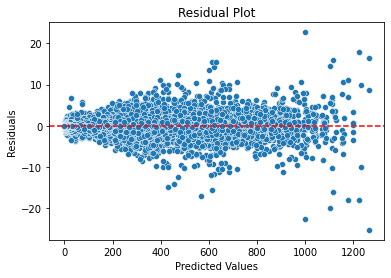

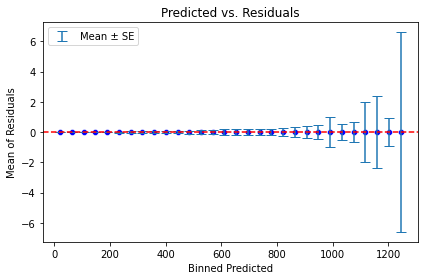

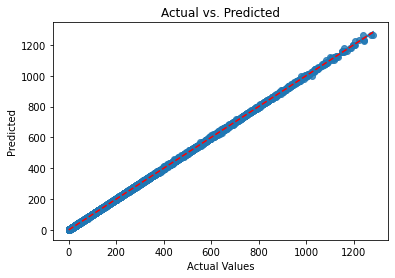

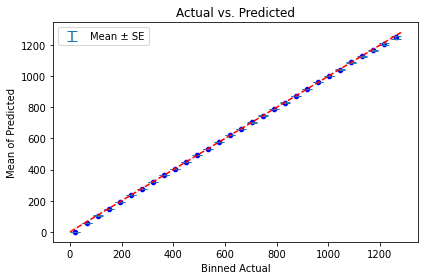

Val--------
Mean Squared Error: 0.3059862655903311
MAPE: 0.055152504589744966
R-squared: 0.9998339254087703


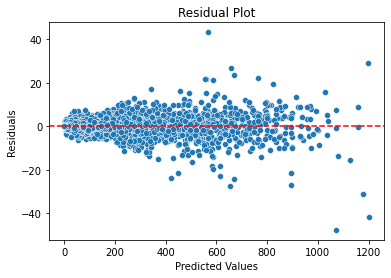

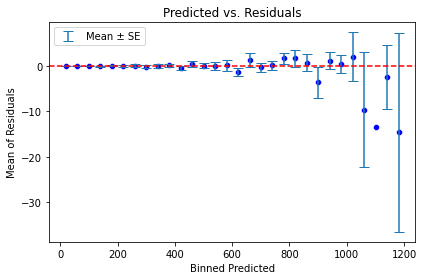

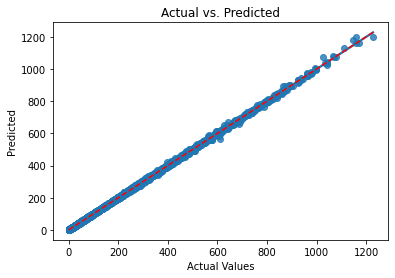

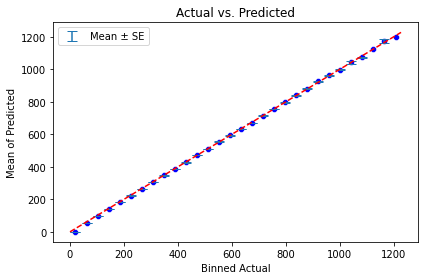

In [4]:
X_train, X_val, X_test, y_train, y_val, y_test = get_train_test_split(X, y, return_concat=False)
X_cv = pd.concat([X_train, X_val])
y_cv = pd.concat([y_train, y_val])

tree_model = DecisionTreeRegressor(max_depth=20, min_samples_split=5, min_samples_leaf=2, max_features=100, random_state=random_seed)
tree_model.fit(X_cv, y_cv)

run_val_pipeline(tree_model, X_cv, X_test, y_cv, y_test, bins=30)

In [5]:
get_feature_importance(X_train.columns, tree_model)

,Feature,Importance
3,gflops,0.517487
5,dtype_32,0.482308
1,m,0.000107
2,p,0.000058
0,n,0.000035
4,dtype_16,0.000003
6,dtype_b16,0.000002


## Random Forest

Train--------
Mean Squared Error: 0.0589909271199414
MAPE: 0.015153013838127092
R-squared: 0.9999691517869344


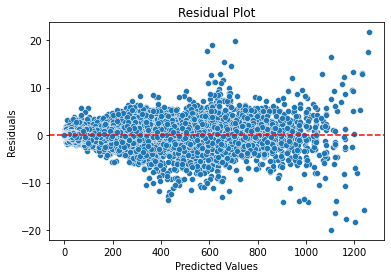

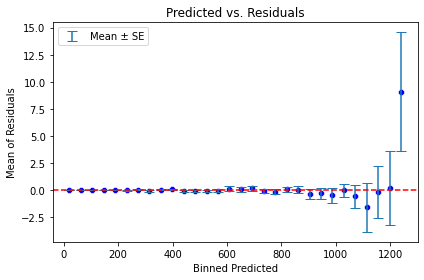

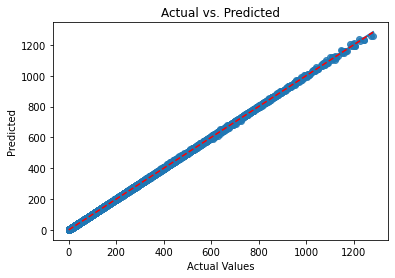

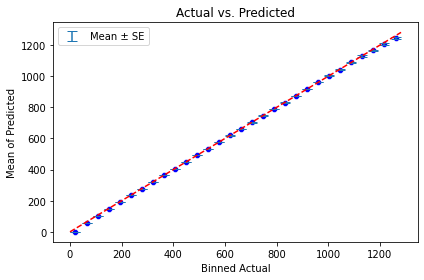

Val--------
Mean Squared Error: 0.1896496486007777
MAPE: 0.02805424238034869
R-squared: 0.9998984829111649


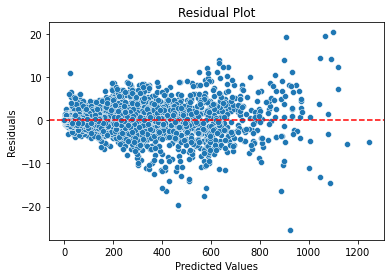

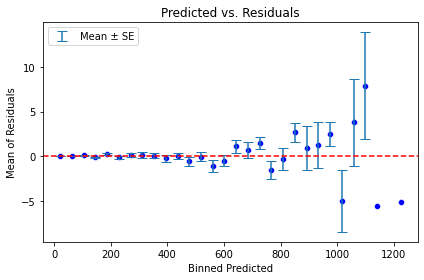

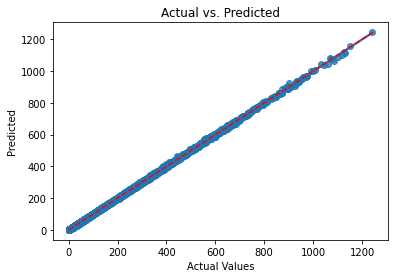

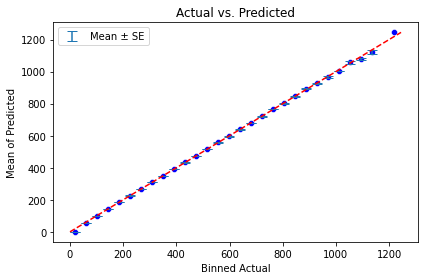

In [5]:
X_train, X_val, X_test, y_train, y_val, y_test = get_train_test_split(X, y, return_concat=False)
X_cv = pd.concat([X_train, X_val])
y_cv = pd.concat([y_train, y_val])

tree_model = RandomForestRegressor(max_depth=80, min_samples_split=2, min_samples_leaf=2, max_features=100, random_state=random_seed)
tree_model.fit(X_cv, y_cv)

run_val_pipeline(tree_model, X_cv, X_test, y_cv, y_test, bins=30)

# Save Model

In [7]:
import joblib
joblib.dump(tree_model, '../h100_models/mm.joblib')

['../h100_models/mm.joblib']